## Air Pollution

Let us use a neural network to predict the air polution at US embassy in Beijing using the following data from UCI MAchine Learning repository: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch import nn
import torch
import time

In [66]:
def parse_date(year, month, day, hour):
    return datetime(int(year), int(month), int(day), int(hour))

In [67]:
df = pd.read_csv('../data/pollution.csv', parse_dates=[['year', 'month', 'day', 'hour']], date_parser=parse_date)
df = df.drop('No', axis=1)
df.columns = ['date', 'pollution', 'dew_temp', 'temp', 'pressure', 'wind_dir', 'wind_speed', 'snow', 'rain']
df.index = df['date']
df = df.drop('date', axis=1)
df = df[24:]
df['pollution'] = df['pollution'].fillna(df['pollution'].median())
df['wind_dir'] = df['wind_dir'].astype('category').cat.codes

In [68]:
df

,pollution,dew_temp,temp,pressure,wind_dir,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,2,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,2,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,2,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,2,12.51,0,0


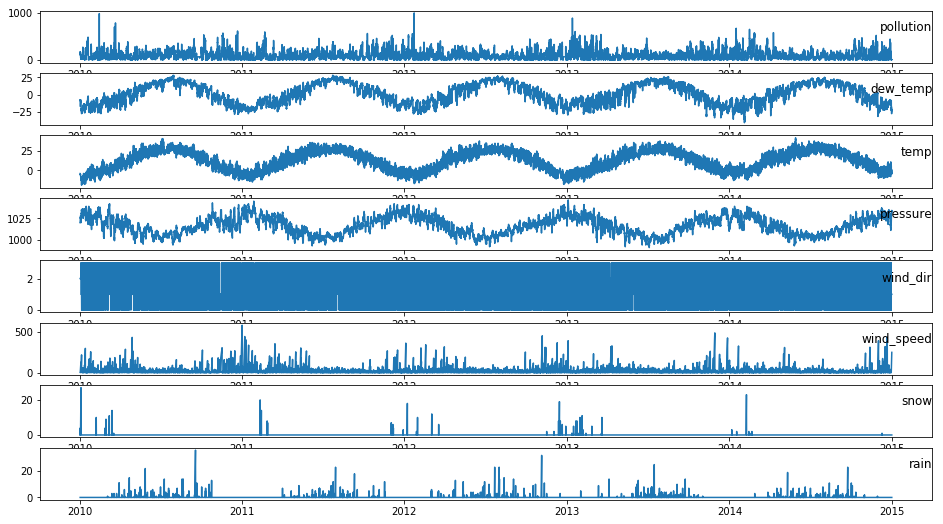

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,9))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    plt.plot(df[df.columns[i]])
    plt.title(df.columns[i], loc='right', y =.5)

## Target
We want to predict the olusion in the next our, given the previous context data.
So let us first add a target column:

In [110]:
df['target'] = df['pollution'].shift(-1)
df = df[:-1]
features = [col for col in df.columns if col != 'target']

## Train, Test
We can not shuffle the data for random splits anymore, as we will train sequentailly.
Therefore, we define a date at which we split the data:

In [111]:
train_end = datetime(2014, 1, 1)
#val_end = datetime(2014, 7, 1)
train = df[:train_end]
#val = df[train_end:val_end]
test = df[train_end:]

In [112]:
def window_nd(a, window, steps = None, axis = None, outlist = False):
        """
        Create a windowed view over `n`-dimensional input that uses an 
        `m`-dimensional window, with `m <= n`.
        
    
        Parameters
        -------------
        a : Array-like
            The array to create the view on
    
        window : tuple or int
            If int, the size of the window in `axis`, or in all dimensions if 
            `axis == None`
    
            If tuple, the shape of the desired window.  `window.size` must be:
                equal to `len(axis)` if `axis != None`, else 
                equal to `len(a.shape)`, or 
                1
    
        steps : tuple, int or None
            The offset between consecutive windows in desired dimension
            If None, offset is one in all dimensions
            If int, the offset for all windows over `axis`
            If tuple, the steps along each `axis`.  
                `len(steps)` must me equal to `len(axis)`
    
        axis : tuple, int or None
            The axes over which to apply the window
            If None, apply over all dimensions
            if tuple or int, the dimensions over which to apply the window
    
        outlist : boolean
            If output should be as list of windows.  
            If False, it will be an array with 
                `a.nidim + 1 <= a_view.ndim <= a.ndim *2`.  
            If True, output is a list of arrays with `a_view[0].ndim = a.ndim`
                Warning: this is a memory-intensive copy and not a view
    
        Returns
        -------
    
        a_view : ndarray
            A windowed view on the input array `a`, or copied list of windows   
    
        """
        ashp = np.array(a.shape)
    
        if axis != None:
            axs = np.array(axis, ndmin = 1)
            assert np.all(np.in1d(axs, np.arange(ashp.size))), "Axes out of range"
        else:
            axs = np.arange(ashp.size)
    
        window = np.array(window, ndmin = 1)
        assert (window.size == axs.size) | (window.size == 1), "Window dims and axes don't match"
        wshp = ashp.copy()
        wshp[axs] = window
        assert np.all(wshp <= ashp), "Window is bigger than input array in axes"
    
        stp = np.ones_like(ashp)
        if steps:
            steps = np.array(steps, ndmin = 1)
            assert np.all(steps > 0), "Only positive steps allowed"
            assert (steps.size == axs.size) | (steps.size == 1), "Steps and axes don't match"
            stp[axs] = steps
    
        astr = np.array(a.strides)
        shape = tuple((ashp - wshp) // stp + 1) + tuple(wshp)
        strides = tuple(astr * stp) + tuple(astr)
    
        as_strided = np.lib.stride_tricks.as_strided
        a_view = np.squeeze(as_strided(a, 
                                     shape = shape, 
                                     strides = strides))
        #print(astr, strides, shape, a_view)
        if outlist:
            return list(a_view.reshape((-1,) + tuple(wshp)))
        else:
            return a_view

## Scale
Neural networks work best if the data have the same input scale. To achieve this, we will use sklearn's MinMaxScaler:

In [113]:
df = df.astype(np.float32)
scaler = MinMaxScaler()
past_samples = 10
x_train = window_nd(scaler.fit_transform(train[features]), past_samples, 1, axis=0)
x_test = window_nd(scaler.transform(test[features]), past_samples, 1, axis=0)
y_train = scaler.fit_transform(train['target'].values.reshape(-1, 1))
y_test = scaler.transform(test['target'].values.reshape(-1, 1))

/home/jendrik/.local/share/virtualenvs/DLWorkshop-o4GQ4Aql/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [114]:
class RNNNet(nn.Module):
    
    def __init__(self, number_of_inputs, hidden_size, num_layers):
        super().__init__()
        # Build the recurrent parts using nn.RNN
        self.rnn = nn.RNN(number_of_inputs, hidden_size, num_layers)
        # Use a ReLU as an activation
        self.act = nn.ReLU()
        # Use a linear output layer
        self.out = nn.Linear(hidden_size, 1)
    
    def forward(self, inp):
        # implement the rest of the forward function
        output, x = self.rnn(inp)
        x = self.act(x)
        return self.out(x)

In [115]:
def fit_batch(optim, loss, net, x, y):
    optim.zero_grad()
    y_pred = net(x)
    err = loss(y_pred, y)
    err.mean().backward()
    optim.step()
    return y_pred, err

In [184]:
torch.cuda.manual_seed(42)
np.random.seed(42)
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
batch_size = 128
batches_per_epoch = 5
epochs = 20
net = RNNNet(x_train.shape[-1], 50, 1).to(device)
loss = nn.L1Loss()
optim = torch.optim.Adam(net.parameters(), lr=1e-4)
start = time.time()  
for epoch in range(epochs):
    train_err = None
    for j in range(batches_per_epoch):
        select = np.random.randint(0, len(x_train), batch_size)
        x = torch.from_numpy(x_train[select]).float().to(device)
        y = torch.from_numpy(y_train[select]).float().unsqueeze(1).to(device)
        y_pred, err = fit_batch(optim, loss, net, x, y)
        if train_err is None:
            train_err = err
        else:
            train_err += err
        #y_pred = y_pred.argmax(dim=-1)
        #acc += (y==y_pred).float().mean()
    x = torch.from_numpy(x_test).float().to(device)
    y = torch.from_numpy(y_test).float().unsqueeze(1).to(device)
    y_pred = net(x)
    test_err = loss(y_pred, y)
    print(f'Epoch {epoch} train_loss {train_err/batches_per_epoch} test_loss {test_err}')
print(f'Training time: {time.time() - start}')

Epoch 0 train_loss 0.10288852453231812 test_loss 0.0965639054775238
Epoch 1 train_loss 0.09170345216989517 test_loss 0.08904297649860382
Epoch 2 train_loss 0.08240438252687454 test_loss 0.0827227234840393
Epoch 3 train_loss 0.07837570458650589 test_loss 0.07737291604280472
Epoch 4 train_loss 0.07263043522834778 test_loss 0.07281169295310974
Epoch 5 train_loss 0.06614358723163605 test_loss 0.06964071094989777
Epoch 6 train_loss 0.06295976787805557 test_loss 0.06753430515527725
Epoch 7 train_loss 0.06272052973508835 test_loss 0.06625144183635712
Epoch 8 train_loss 0.062145013362169266 test_loss 0.06543813645839691
Epoch 9 train_loss 0.06538783013820648 test_loss 0.0651383325457573
Epoch 10 train_loss 0.06480135768651962 test_loss 0.06512583792209625
Epoch 11 train_loss 0.07013901323080063 test_loss 0.06526806950569153
Epoch 12 train_loss 0.05858181044459343 test_loss 0.06548772752285004
Epoch 13 train_loss 0.05812860652804375 test_loss 0.06564411520957947
Epoch 14 train_loss 0.0612452588

In [155]:
class LSTMNet(nn.Module):
    
    def __init__(self, number_of_inputs, hidden_size, num_layers):
        super().__init__()
        # Build the recurrent parts using nn.RNN
        self.rnn = nn.LSTM(number_of_inputs, hidden_size, num_layers)
        # Use a ReLU as an activation
        self.act = nn.ReLU()
        # Use a linear output layer
        self.out = nn.Linear(hidden_size, 1)
    
    def forward(self, inp):
        # implement the rest of the forward function
        output, x = self.rnn(inp)
        x = self.act(x[0])
        return self.out(x)

In [185]:
torch.cuda.manual_seed(42)
np.random.seed(46)
net = LSTMNet(x_train.shape[-1], 50, 1).to(device)
optim = torch.optim.Adam(net.parameters(), lr=1e-4)
start = time.time()  
for epoch in range(epochs):
    train_err = None
    for j in range(batches_per_epoch):
        select = np.random.randint(0, len(x_train), batch_size)
        x = torch.from_numpy(x_train[select]).float().to(device)
        y = torch.from_numpy(y_train[select]).float().unsqueeze(1).to(device)
        y_pred, err = fit_batch(optim, loss, net, x, y)
        if train_err is None:
            train_err = err
        else:
            train_err += err
        #y_pred = y_pred.argmax(dim=-1)
        #acc += (y==y_pred).float().mean()
    x = torch.from_numpy(x_test).float().to(device)
    y = torch.from_numpy(y_test).float().unsqueeze(1).to(device)
    y_pred = net(x)
    test_err = loss(y_pred, y)
    print(f'Epoch {epoch} train_loss {train_err/batches_per_epoch} test_loss {test_err}')
print(f'Training time: {time.time() - start}')

Epoch 0 train_loss 0.19712522625923157 test_loss 0.19039517641067505
Epoch 1 train_loss 0.18740971386432648 test_loss 0.18694628775119781
Epoch 2 train_loss 0.18447481095790863 test_loss 0.18362188339233398
Epoch 3 train_loss 0.1831008642911911 test_loss 0.18010804057121277
Epoch 4 train_loss 0.17190906405448914 test_loss 0.17653295397758484
Epoch 5 train_loss 0.1664239913225174 test_loss 0.17308056354522705
Epoch 6 train_loss 0.16384868323802948 test_loss 0.1696014702320099
Epoch 7 train_loss 0.1592358946800232 test_loss 0.16602164506912231
Epoch 8 train_loss 0.15971146523952484 test_loss 0.1617586314678192
Epoch 9 train_loss 0.14501570165157318 test_loss 0.1574212610721588
Epoch 10 train_loss 0.14720419049263 test_loss 0.1526923030614853
Epoch 11 train_loss 0.1462501585483551 test_loss 0.14772185683250427
Epoch 12 train_loss 0.13203494250774384 test_loss 0.1426238864660263
Epoch 13 train_loss 0.1289566457271576 test_loss 0.13748699426651
Epoch 14 train_loss 0.12491895258426666 test_l

In [164]:
class LSTMNetWithDropout(nn.Module):
    
    def __init__(self, number_of_inputs, hidden_size, num_layers, dropout):
        super().__init__()
        # Build the recurrent parts using nn.RNN
        self.rnn = nn.LSTM(number_of_inputs, hidden_size, num_layers)
        # Use a ReLU as an activation
        self.act = nn.ReLU()
        # Use a linear output layer
        self.out = nn.Linear(hidden_size, 1)
        # Build the recurrent parts using nn.RNN
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, inp):
        # implement the rest of the forward function
        output, x = self.rnn(inp)
        x = self.act(self.dropout(x[0]))
        return self.out(x)

In [186]:
torch.cuda.manual_seed(42)
np.random.seed(42)
net = LSTMNetWithDropout(x_train.shape[-1], 50, 1, .3).to(device)
optim = torch.optim.Adam(net.parameters(), lr=1e-4)
start = time.time()  
batches_per_epoch_new = batches_per_epoch * 4
for epoch in range(epochs):
    train_err = None
    for j in range(batches_per_epoch_new):
        select = np.random.randint(0, len(x_train), batch_size)
        x = torch.from_numpy(x_train[select]).float().to(device)
        y = torch.from_numpy(y_train[select]).float().unsqueeze(1).to(device)
        y_pred, err = fit_batch(optim, loss, net, x, y)
        if train_err is None:
            train_err = err
        else:
            train_err += err
        #y_pred = y_pred.argmax(dim=-1)
        #acc += (y==y_pred).float().mean()
    x = torch.from_numpy(x_test).float().to(device)
    y = torch.from_numpy(y_test).float().unsqueeze(1).to(device)
    y_pred = net(x)
    test_err = loss(y_pred, y)
    print(f'Epoch {epoch} train_loss {train_err/batches_per_epoch_new} test_loss {test_err}')
print(f'Training time: {time.time() - start}')

Epoch 0 train_loss 0.21653766930103302 test_loss 0.194723442196846
Epoch 1 train_loss 0.1901976615190506 test_loss 0.1511300504207611
Epoch 2 train_loss 0.16349616646766663 test_loss 0.1466553509235382
Epoch 3 train_loss 0.13026994466781616 test_loss 0.12221505492925644
Epoch 4 train_loss 0.10136949270963669 test_loss 0.0862298309803009
Epoch 5 train_loss 0.07811951637268066 test_loss 0.07685628533363342
Epoch 6 train_loss 0.07085942476987839 test_loss 0.07351645082235336
Epoch 7 train_loss 0.06804076582193375 test_loss 0.07234837859869003
Epoch 8 train_loss 0.0695391297340393 test_loss 0.07284455001354218
Epoch 9 train_loss 0.07019118964672089 test_loss 0.07258576154708862
Epoch 10 train_loss 0.06948737055063248 test_loss 0.07463039457798004
Epoch 11 train_loss 0.07023206353187561 test_loss 0.07882055640220642
Epoch 12 train_loss 0.07092172652482986 test_loss 0.07037040591239929
Epoch 13 train_loss 0.06951913982629776 test_loss 0.0672563835978508
Epoch 14 train_loss 0.0664076134562492